In [1]:
import sys, os

hostname = os.uname()[1]

if "crc" in hostname:
    scriptdir = "/cr/users/filip/bin/"
elif "beep-boop" == hostname:
    scriptdir = "/home/quizznor/projects/phd-thesis/bin/"

sys.path.append(scriptdir)

from utils.binaries import *
from utils.plotting import *

17:46:17 [INFO] utils          -- (  +581ms) -- import logging
17:46:17 [INFO] utils.binaries -- (  +170ms) -- import numpy as np
17:46:17 [INFO] utils.binaries -- (  +214ms) -- import pandas as pd
17:46:17 [INFO] utils.binaries -- (    +2ms) -- import binaries.tools as tool
17:46:18 [INFO] utils.plotting -- (  +307ms) -- import matplotlib.pyplot as plt
17:46:18 [INFO] utils.plotting -- (  +276ms) -- import seaborn as so
17:46:18 [DBUG] utils.plotting -- (    +7ms) -- font size set to 4
17:46:18 [DBUG] utils.plotting -- (    +1ms) -- figure size set to [2.4, 1.2]
17:46:18 [DBUG] utils.plotting -- (    +1ms) -- plotting style set to `notebook`.
17:46:18 [INFO] utils.plotting -- (    +1ms) -- import plotting.tools as plot


In [2]:
lgE, EJ, Err_up, Err_down, N = np.loadtxt("CombinedSpectrum_ICRC2017.txt", unpack=True)
# EJ *= 3e13                              # WTF???
E_true = 10 ** lgE

# there is a discrepancy here, wtf?
def SpectrumICRC2017(E):

    # data from https://pos.sissa.it/301/486/pdf
    # 
    J0 = 8.34e-11
    # J0 /= 6.5e3                           # WTF???

    E_ankle = 5.08e18
    E_s = 3.9e19
    gamma1 = 3.293
    gamma2 = 2.53
    deltaG = 2.5

    J_below = lambda x: J0 * np.power(x/E_ankle,-gamma1)
    J_above = lambda x: J0 * np.power(x/E_ankle,-gamma2) * (1 + np.power(E_ankle/E_s, deltaG)) / (1 + np.power(x/E_s, deltaG))

    return np.piecewise(E, [E < E_ankle, E >= E_ankle], [J_below, J_above])

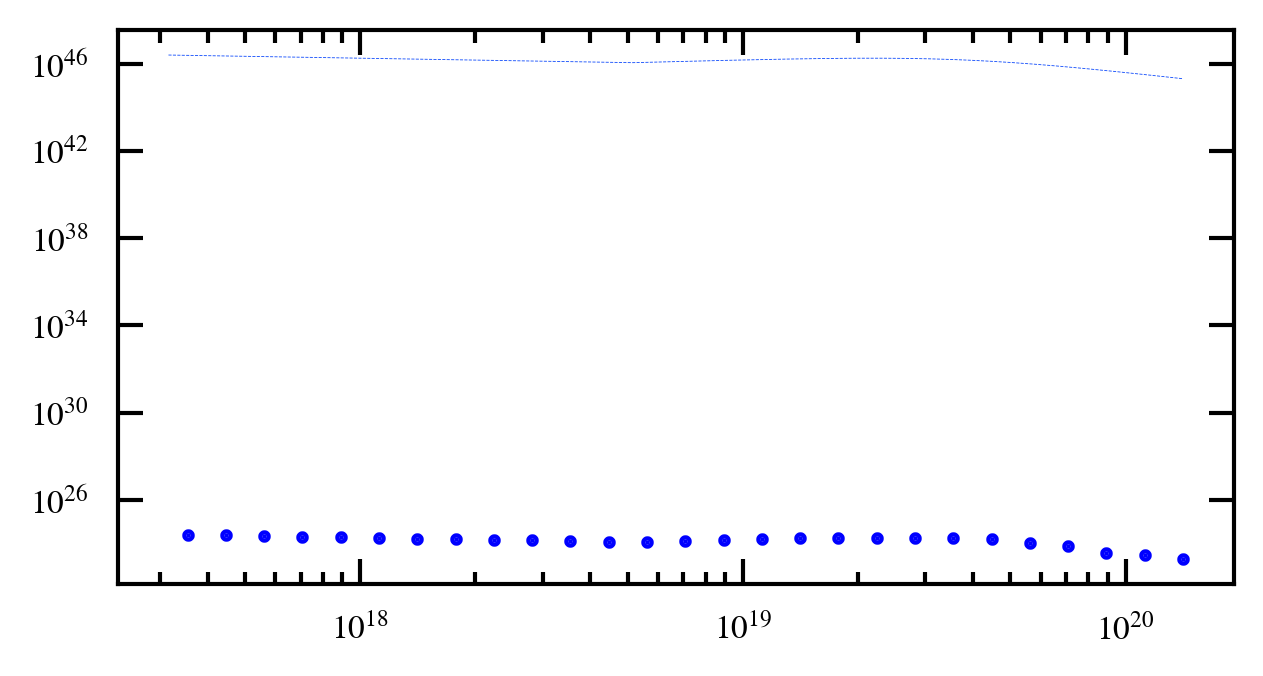

In [3]:
plt.errorbar(E_true, E_true ** 2 * EJ, yerr=[Err_down, Err_up], fmt="bo", markersize=0.5)

E_smooth = np.geomspace(10**17.5, 10**20.15, 1000)
plt.plot(E_smooth, E_smooth ** 3 * SpectrumICRC2017(E_smooth), lw=0.1, ls='--')
plt.yscale('log')
plt.xscale('log')

In [264]:
# Calculate events (per km2 per sr per yr)
# 67000 = Francescos exposure in ICRC2017 paper

cut_from = np.argmin(np.abs(5e18 - E_true))
events = sum(N[cut_from:]) / 67000

print(np.round(events, 1))

1.4
